## Pandas Foundations

### Data ingestion & inspection


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('world_ind_pop_data.csv')
df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [4]:
df.tail()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


In [12]:
# Create array of DataFrame values: np_vals
np_vals = np.array([[3.03497056e+09],
       [3.68482270e+09],
       [4.43659036e+09],
       [5.28271599e+09],
       [6.11597449e+09],
       [6.92428294e+09]])

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

df2 = pd.DataFrame(data=np_vals, columns=['Total Population'], index=[1960, 1970, 1980, 1990, 2000, 2010])
# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df2)

# Print original and new data containers
print(type(np_vals), type(np_vals_log10))
print(type(df2), type(df_log10))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


### Reading a flat file

In [13]:
# Read in the file: df1
df1 = pd.read_csv('world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


### Delimiters, headers, and extensions

In [16]:
# Read the raw file as-is: df1
df1 = pd.read_csv('messy_stock_data.tsv')

# Print the output of df1.head()
print(df1.head())

# Read in the file with the correct parameters: df2
df2 = pd.read_csv('messy_stock_data.tsv', delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.head())

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv('tmp_clean_stock_data.csv', index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.47   47.53   45.96   45.61   45.51   
2  GOOGLE  51

### Plotting series using pandas

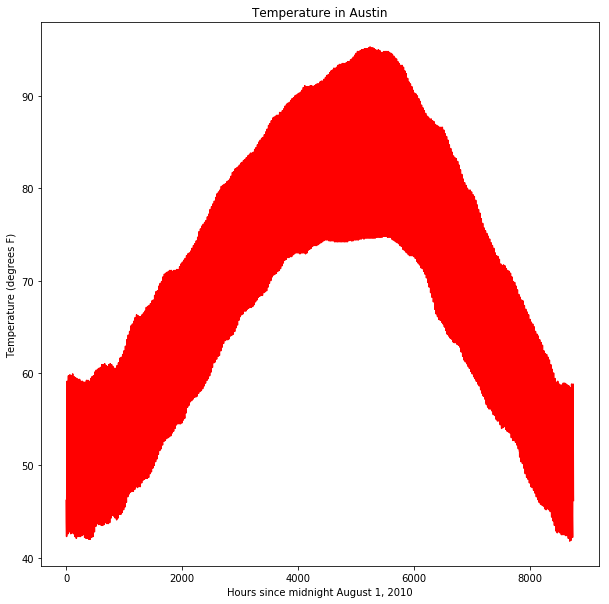

In [62]:
import matplotlib.pyplot as plt

df = pd.read_csv('weather_data_austin_2010.csv')

# Create a plot with color='red'
df.Temperature.plot(color='red', figsize=(10,10))

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

In [24]:
df.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


### Plotting DataFrames

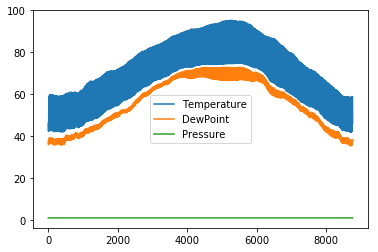

In [26]:
df.plot();

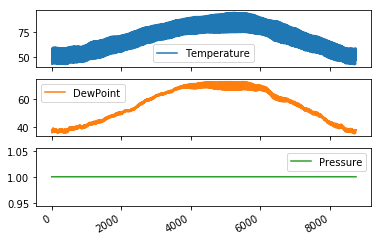

In [27]:
# Plot all columns as subplots
df.plot(subplots=True)
plt.show()


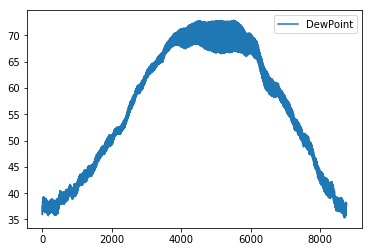

In [30]:

# Plot just the Dew Point data
column_list1 = ['DewPoint']
df[column_list1].plot()
plt.show()



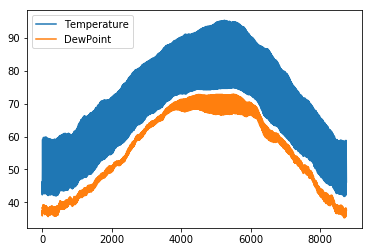

In [31]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
df[column_list2].plot()
plt.show()

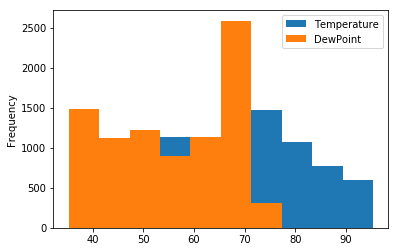

In [32]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
df[column_list2].plot(kind='hist')
plt.show()

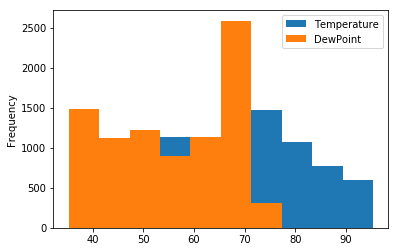

In [33]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
df[column_list2].plot.hist()
plt.show()

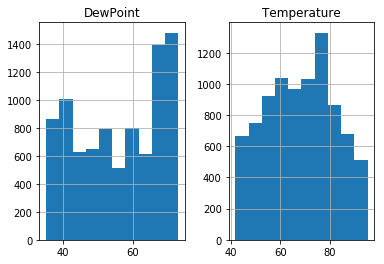

In [34]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature','DewPoint']
df[column_list2].hist()
plt.show()

### Exploratory data analysis


In [ ]:
# Create a list of y-axis column names: y_columns
y_columns = df[['AAPL','IBM']].columns

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()


### pandas scatter plots

In [35]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [37]:
sizes = np.array([ 51.12044694,  56.78387977,  49.15557238,  49.06977358,
        49.52823321,  78.4595872 ,  78.93021696,  77.41479205,
        81.52541106,  61.71459825,  52.85646225,  54.23007578,
        58.89427963,  39.65137852,  23.42587473,  33.41639502,
        32.03903011,  27.8650165 ,  18.88972581,  14.0196956 ,
        29.72619722,  24.58549713,  23.48516821,  20.77938954,
        29.19459189,  88.67676838,  79.72987328,  79.94866084,
        93.23005042,  18.88972581,  21.34122243,  20.6679223 ,
        28.88670381,  49.24144612,  46.14174741,  45.39631334,
        45.01218186,  73.76057586,  82.96880195,  71.84547684,
        69.85320595, 102.22421043,  93.78252358, 110.        ,
        36.52889673,  24.14234281,  44.84805372,  41.02504618,
        20.51976563,  18.765772  ,  17.9095202 ,  17.75442285,
        13.08832041,  10.83266174,  14.00441945,  15.91328975,
        21.60597587,  18.8188451 ,  21.15311208,  24.14234281,
        20.63083317,  76.05635059,  80.05816704,  71.18975117,
        70.98330444,  56.13992036,  89.36985382,  84.38736544,
        82.6716892 ,  81.4149056 ,  22.60363518,  63.06844313,
        69.92143863,  76.76982089,  69.2066568 ,  35.81711267,
        26.25184749,  36.94940537,  19.95069229,  23.88237331,
        21.79608472,  26.1474042 ,  19.49759118,  18.36136808,
        69.98970461,  56.13992036,  66.21810474,  68.02351436,
        59.39644014, 102.10046481,  82.96880195,  79.25686195,
        74.74521151,  93.34830013, 102.05923292,  60.7883734 ,
        40.55589449,  44.7388015 ,  36.11079464,  37.9986264 ,
        35.11233175,  15.83199594, 103.96451839, 100.21241654,
        90.18186347,  84.27493641,  32.38645967,  21.62494928,
        24.00218436,  23.56434276,  18.78345471,  22.21725537,
        25.44271071,  21.36007926,  69.37650986,  76.19877818,
        14.51292942,  19.38962134,  27.75740889,  34.24717407,
        48.10262495,  29.459795  ,  32.80584831,  55.89556844,
        40.06360581,  35.03982309,  46.33599903,  15.83199594,
        25.01226779,  14.03498009,  26.90404245,  59.52231336,
        54.92349014,  54.35035315,  71.39649768,  91.93424995,
        82.70879915,  89.56285636,  75.45251972,  20.50128352,
        16.04379287,  22.02531454,  11.32159874,  16.70430249,
        18.80114574,  18.50153068,  21.00322336,  25.79385418,
        23.80266582,  16.65430211,  44.35746794,  49.815853  ,
        49.04119063,  41.52318884,  90.72524338,  82.07906251,
        84.23747672,  90.29816462,  63.55551901,  63.23059357,
        57.92740995,  59.64831981,  38.45278922,  43.19643409,
        41.81296121,  19.62393488,  28.99647648,  35.35456858,
        27.97283229,  30.39744886,  20.57526193,  26.96758278,
        37.07354237,  15.62160631,  42.92863291,  30.21771564,
        36.40567571,  36.11079464,  29.70395123,  13.41514444,
        25.27829944,  20.51976563,  27.54281821,  21.17188565,
        20.18836167,  73.97101962,  73.09614831,  65.35749368,
        73.97101962,  43.51889468,  46.80945169,  37.77255674,
        39.6256851 ,  17.24230306,  19.49759118,  15.62160631,
        13.41514444,  55.49963323,  53.18333207,  55.31736854,
        42.44868923,  13.86730874,  16.48817545,  19.33574884,
        27.3931002 ,  41.31307817,  64.63368105,  44.52069676,
        35.74387954,  60.75655952,  79.87569835,  68.46177648,
        62.35745431,  58.70651902,  17.41217694,  19.33574884,
        13.86730874,  22.02531454,  15.75091031,  62.68013142,
        68.63071356,  71.36201911,  76.80558184,  51.58836621,
        48.84134317,  54.86301837,  51.73502816,  74.14661842,
        72.22648148,  77.88228247,  78.24284811,  15.67003285,
        31.25845963,  21.36007926,  31.60164234,  17.51450098,
        17.92679488,  16.40542438,  19.96892459,  32.99310928,
        28.14577056,  30.80379718,  16.40542438,  13.48998471,
        16.40542438,  17.84050478,  13.48998471,  47.1451025 ,
        58.08281541,  53.06435374,  52.02897659,  41.44433489,
        36.60292926,  30.80379718,  48.98404972,  42.90189859,
        47.56635225,  39.24128299,  54.56115914,  48.41447259,
        48.84134317,  49.41341845,  42.76835191,  69.30854366,
        19.33574884,  27.28640858,  22.02531454,  20.70504474,
        26.33555201,  31.37264569,  33.93740821,  24.08222494,
        33.34566004,  41.05118927,  32.52595611,  48.41447259,
        16.48817545,  18.97851406,  43.84255439,  37.22278157,
        34.77459916,  44.38465193,  47.00510227,  61.39441929,
        57.77221268,  65.12675249,  61.07507305,  79.14790534,
        68.42801405,  54.10993164,  64.63368105,  15.42864956,
        16.24054679,  15.26876826,  29.68171358,  51.88189829,
        63.32798377,  42.36896092,  48.6988448 ,  20.15170555,
        19.24612787,  16.98905358,  18.88972581,  29.68171358,
        28.03762169,  30.35246559,  27.20120517,  19.13885751,
        16.12562794,  18.71277385,  16.9722369 ,  29.85984799,
        34.29495526,  37.54716158,  47.59450219,  19.93246832,
        30.60028577,  26.90404245,  24.66650366,  21.36007926,
        18.5366546 ,  32.64243213,  18.5366546 ,  18.09999962,
        22.70075058,  36.23351603,  43.97776651,  14.24983724,
        19.15671509,  14.17291518,  35.25757392,  24.38356372,
        26.02234705,  21.83420642,  25.81458463,  28.90864169,
        28.58044785,  30.91715052,  23.6833544 ,  12.82391671,
        14.63757021,  12.89709155,  17.75442285,  16.24054679,
        17.49742615,  16.40542438,  20.42743834,  17.41217694,
        23.58415722,  19.96892459,  20.33531923,  22.99334585,
        28.47146626,  28.90864169,  43.43816712,  41.57579979,
        35.01567018,  35.74387954,  48.5565546 ,  57.77221268,
        38.98605581,  49.98882458,  28.25412762,  29.01845599,
        23.88237331,  27.60710798,  26.54539622,  31.14448175,
        34.17556473,  16.3228815 ,  17.0732619 ,  16.15842026,
        18.80114574,  18.80114574,  19.42557798,  20.2434083 ,
        20.98452475,  16.07650192,  16.07650192,  16.57113469,
        36.11079464,  37.84783835,  27.82194848,  33.46359332,
        29.5706502 ,  23.38638738,  36.23351603,  32.40968826,
        18.88972581,  21.92965639,  28.68963762,  30.80379718])

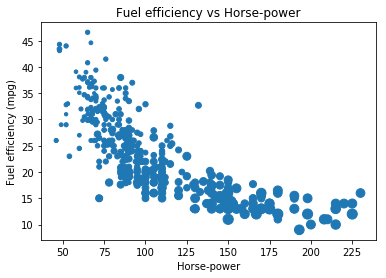

In [38]:
# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

### pandas box plots

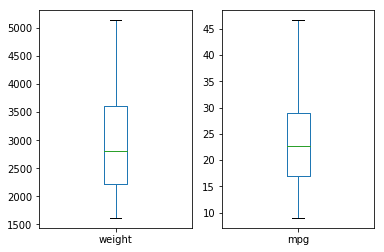

In [39]:
# Make a list of the column names to be plotted: cols
cols = df[['weight', 'mpg']].columns

# Generate the box plots
df[cols].plot(kind='box',subplots=True)

# Display the plot
plt.show()

### pandas hist, pdf and cdf

In [41]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


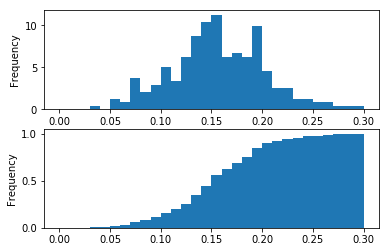

In [51]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', bins=30, normed=True, range=(0,.3))

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist', bins=30, cumulative=True, normed=True, range=(0,.3))
plt.show()

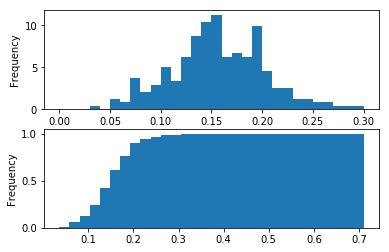

In [50]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', bins=30, density=True, range=(0,.3))

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist', bins=30, cumulative=1, density=True)
plt.show()

### Fuel efficiency

In [54]:
df = pd.read_csv('auto-mpg.csv')
df.mpg.median()

22.75

### Bachelor's degrees awarded to women

In [56]:
df = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
df.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


0.8
19.0


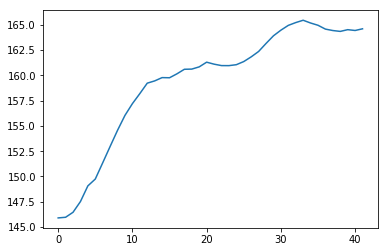

In [57]:
# Print the minimum value of the Engineering column
print(df.Engineering.min())

# Print the maximum value of the Engineering column
print(df.Engineering.max())

# Construct the mean percentage per year: mean
mean = df.mean(axis=1) 

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

### Median vs mean

In [58]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


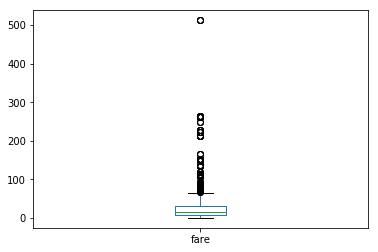

In [59]:
# Print summary statistics of the fare column with .describe()
print(df.fare.describe())

# Generate a box plot of the fare column
df.fare.plot.box()

# Show the plot
plt.show()

### Quantiles

In [60]:
df = pd.read_csv('life_expectancy_at_birth.csv')
df.head()

,Unnamed: 0,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


208
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 218 columns]


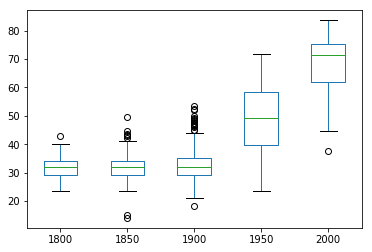

In [61]:
# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()


### Filtering and counting 

How many automobiles were manufactured in Asia in the automobile dataset? 

In [63]:
df = pd.read_csv('auto-mpg.csv')
df.query('origin == "Asia"').count()[0]

79

### Separate and summarize

How does the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In [64]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df.mean()
global_std = df.std()

# Filter the US population from the origin column: us
us = df.query('origin == "US"')

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


### Separate and plot

In [65]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Unsurprisingly, passengers in the first class had the highest fare.

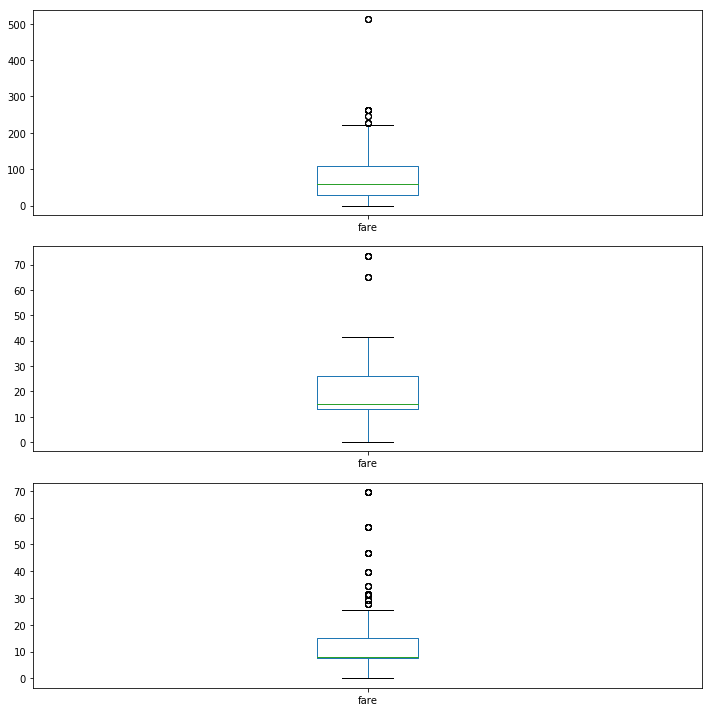

In [69]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

# Display the plot
plt.tight_layout()

In [78]:
titanic.loc[titanic['pclass'] == 1].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [77]:
(titanic['pclass'] == 1).head()

0    True
1    True
2    True
3    True
4    True
Name: pclass, dtype: bool

## Time series in pandas


### Reading and slicing times

In [79]:
df = pd.read_csv('weather_data_austin_2010.csv')
df.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
Date           8759 non-null object
dtypes: float64(3), object(1)
memory usage: 273.8+ KB


In [84]:
df2 = pd.read_csv('weather_data_austin_2010.csv', parse_dates=['Date'])
df2.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,2010-01-01 00:00:00
1,44.6,37.1,1.0,2010-01-01 01:00:00
2,44.1,36.9,1.0,2010-01-01 02:00:00
3,43.8,36.9,1.0,2010-01-01 03:00:00
4,43.5,36.8,1.0,2010-01-01 04:00:00


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
Date           8759 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 273.8 KB


In [88]:
df3 = pd.read_csv('weather_data_austin_2010.csv', index_col='Date', parse_dates=True)
df3.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


In [91]:
df3.loc['2010-Aug-01']

,Temperature,DewPoint,Pressure
Date,,,
2010-08-01 00:00:00,79.0,70.8,1.0
2010-08-01 01:00:00,77.4,71.2,1.0
2010-08-01 02:00:00,76.4,71.3,1.0
2010-08-01 03:00:00,75.7,71.4,1.0
2010-08-01 04:00:00,75.1,71.4,1.0
2010-08-01 05:00:00,74.6,71.3,1.0
2010-08-01 06:00:00,74.5,71.3,1.0
2010-08-01 07:00:00,76.0,72.3,1.0
2010-08-01 08:00:00,79.8,72.8,1.0


### Creating and using a DatetimeIndex

In [93]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(['20100101 00:00', '20100101 01:00', '20100101 02:00', '20100101 03:00', '20100101 04:00'], format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series([46.2, 44.6, 44.1, 43.8, 43.5], index=my_datetimes)


In [94]:
time_series

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64

In [95]:
time_series.shape

(5,)

### Partial string indexing and slicing

In [98]:
df = pd.read_csv('weather_data_austin_2010.csv', parse_dates=True, index_col="Date")
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


In [100]:
ts0 = df.Temperature

In [101]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['July 4th, 2010']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['12/15/2010':'12/31/2010']

In [102]:
ts1

Date
2010-10-11 21:00:00    69.0
2010-10-11 22:00:00    67.7
Name: Temperature, dtype: float64

In [103]:
ts2

Date
2010-07-04 00:00:00    77.6
2010-07-04 01:00:00    76.3
2010-07-04 02:00:00    75.5
2010-07-04 03:00:00    74.9
2010-07-04 04:00:00    74.6
2010-07-04 05:00:00    74.2
2010-07-04 06:00:00    74.4
2010-07-04 07:00:00    76.0
2010-07-04 08:00:00    79.0
2010-07-04 09:00:00    81.8
2010-07-04 10:00:00    84.6
2010-07-04 11:00:00    86.8
2010-07-04 12:00:00    88.9
2010-07-04 13:00:00    90.1
2010-07-04 14:00:00    91.1
2010-07-04 15:00:00    91.6
2010-07-04 16:00:00    91.5
2010-07-04 17:00:00    90.7
2010-07-04 18:00:00    89.5
2010-07-04 19:00:00    87.3
2010-07-04 20:00:00    84.0
2010-07-04 21:00:00    81.8
2010-07-04 22:00:00    80.0
2010-07-04 23:00:00    78.5
Name: Temperature, dtype: float64

In [104]:
ts3

Date
2010-12-15 00:00:00    48.0
2010-12-15 01:00:00    47.2
2010-12-15 02:00:00    46.5
2010-12-15 03:00:00    46.0
2010-12-15 04:00:00    45.6
2010-12-15 05:00:00    45.3
2010-12-15 06:00:00    45.6
2010-12-15 07:00:00    45.0
2010-12-15 08:00:00    45.8
2010-12-15 09:00:00    49.1
2010-12-15 10:00:00    52.2
2010-12-15 11:00:00    54.9
2010-12-15 12:00:00    57.2
2010-12-15 13:00:00    58.9
2010-12-15 14:00:00    60.2
2010-12-15 15:00:00    60.9
2010-12-15 16:00:00    60.5
2010-12-15 17:00:00    59.1
2010-12-15 18:00:00    55.8
2010-12-15 19:00:00    52.5
2010-12-15 20:00:00    50.7
2010-12-15 21:00:00    49.6
2010-12-15 22:00:00    48.6
2010-12-15 23:00:00    47.7
2010-12-16 00:00:00    47.6
2010-12-16 01:00:00    46.7
2010-12-16 02:00:00    46.1
2010-12-16 03:00:00    45.6
2010-12-16 04:00:00    45.2
2010-12-16 05:00:00    44.8
                       ... 
2010-12-30 18:00:00    54.1
2010-12-30 19:00:00    50.9
2010-12-30 20:00:00    49.0
2010-12-30 21:00:00    47.9
2010-12-30 22:0

### Reindexing the Index

In [111]:
ts1 = pd.Series(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
                  index=['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-16',
               '2016-07-17'])
ts1

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
dtype: int64

In [112]:
ts2 = pd.Series(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
                  index=['2016-07-01', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15'])
ts2

2016-07-01     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
dtype: int64

In [113]:
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)

# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method='ffill')

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4


In [114]:
ts3

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     1.0
2016-07-05     2.0
2016-07-06     3.0
2016-07-07     4.0
2016-07-08     5.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11     6.0
2016-07-12     7.0
2016-07-13     8.0
2016-07-14     9.0
2016-07-15    10.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64

In [115]:
ts4

2016-07-01     0
2016-07-02     0
2016-07-03     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-09     5
2016-07-10     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
2016-07-16    10
2016-07-17    10
dtype: int64

### Resampling and frequency

In [123]:
df.head(8)

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0
2010-01-01 05:00:00,43.0,36.5,1.0
2010-01-01 06:00:00,43.1,36.3,1.0
2010-01-01 07:00:00,42.3,35.9,1.0


In [117]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df.Temperature.resample('6h').mean()

# Downsample to daily data and count the number of data points: df2
df2 = df.Temperature.resample('D').count()

In [118]:
df1.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

In [119]:
df2.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

### Separating and resampling

In [124]:
# Extract temperature data for August: august
august = df['August 2010'].Temperature

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df['February 2010'].Temperature

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()


In [126]:
august.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

In [127]:
august_highs.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

In [128]:
february.head()

Date
2010-02-01 00:00:00    47.8
2010-02-01 01:00:00    46.8
2010-02-01 02:00:00    46.1
2010-02-01 03:00:00    45.5
2010-02-01 04:00:00    44.9
Name: Temperature, dtype: float64

In [129]:
february_lows.head()

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64

### Rolling mean and frequency

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends.

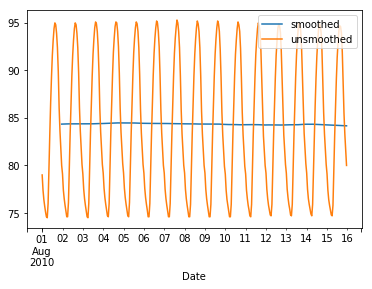

In [131]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-Aug-1':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed': smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

In [138]:
unsmoothed.head(25)

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
2010-08-01 05:00:00    74.6
2010-08-01 06:00:00    74.5
2010-08-01 07:00:00    76.0
2010-08-01 08:00:00    79.8
2010-08-01 09:00:00    83.3
2010-08-01 10:00:00    86.6
2010-08-01 11:00:00    89.3
2010-08-01 12:00:00    91.6
2010-08-01 13:00:00    93.2
2010-08-01 14:00:00    94.4
2010-08-01 15:00:00    95.0
2010-08-01 16:00:00    94.8
2010-08-01 17:00:00    93.9
2010-08-01 18:00:00    92.4
2010-08-01 19:00:00    89.9
2010-08-01 20:00:00    86.1
2010-08-01 21:00:00    83.6
2010-08-01 22:00:00    81.8
2010-08-01 23:00:00    80.0
2010-08-02 00:00:00    79.1
Freq: H, Name: Temperature, dtype: float64

In [137]:
smoothed.head(25)

Date
2010-08-01 00:00:00          NaN
2010-08-01 01:00:00          NaN
2010-08-01 02:00:00          NaN
2010-08-01 03:00:00          NaN
2010-08-01 04:00:00          NaN
2010-08-01 05:00:00          NaN
2010-08-01 06:00:00          NaN
2010-08-01 07:00:00          NaN
2010-08-01 08:00:00          NaN
2010-08-01 09:00:00          NaN
2010-08-01 10:00:00          NaN
2010-08-01 11:00:00          NaN
2010-08-01 12:00:00          NaN
2010-08-01 13:00:00          NaN
2010-08-01 14:00:00          NaN
2010-08-01 15:00:00          NaN
2010-08-01 16:00:00          NaN
2010-08-01 17:00:00          NaN
2010-08-01 18:00:00          NaN
2010-08-01 19:00:00          NaN
2010-08-01 20:00:00          NaN
2010-08-01 21:00:00          NaN
2010-08-01 22:00:00          NaN
2010-08-01 23:00:00    84.350000
2010-08-02 00:00:00    84.354167
Freq: H, Name: Temperature, dtype: float64

### Resample and roll with it

In [140]:
# Extract the August 2010 data: august
august = df['Temperature']['August 2010']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


### Method chaining and filtering

In [156]:
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', index_col='Date (MM/DD/YYYY)', parse_dates=True, header=10)
df.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1741 entries, 2015-07-01 to NaT
Data columns (total 17 columns):
  Carrier Code                            1741 non-null object
Flight Number                             1740 non-null float64
Tail Number                               1740 non-null object
Destination Airport                       1740 non-null object
Scheduled Departure Time                  1740 non-null object
Actual Departure Time                     1740 non-null object
Scheduled Elapsed Time(Minutes)           1740 non-null float64
Actual Elapsed Time(Minutes)              1740 non-null float64
Departure Delay(Minutes)                  1740 non-null float64
Wheels-off Time                           1740 non-null object
Taxi-out Time(Minutes)                    1740 non-null float64
DelayCarrier(Minutes)                     1740 non-null float64
DelayWeather(Minutes)                     1740 non-null float64
DelayNational Aviation System(Minutes)    1740 non-null 

In [158]:
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64

### Missing values and interpolation

In [160]:
ts1 = pd.Series(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
               index=['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-16',
               '2016-07-17'])
ts1

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
dtype: int64

In [161]:
ts2 = pd.Series(data=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
               index=['2016-07-01', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14', '2016-07-15'])
ts2

2016-07-01     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
dtype: int64

In [163]:
ts2.reindex(ts1.index)

2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     1.0
2016-07-05     2.0
2016-07-06     3.0
2016-07-07     4.0
2016-07-08     5.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11     6.0
2016-07-12     7.0
2016-07-13     8.0
2016-07-14     9.0
2016-07-15    10.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64

In [162]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')
ts2_interp

2016-07-01     0.000000
2016-07-02     0.333333
2016-07-03     0.666667
2016-07-04     1.000000
2016-07-05     2.000000
2016-07-06     3.000000
2016-07-07     4.000000
2016-07-08     5.000000
2016-07-09     5.333333
2016-07-10     5.666667
2016-07-11     6.000000
2016-07-12     7.000000
2016-07-13     8.000000
2016-07-14     9.000000
2016-07-15    10.000000
2016-07-16    10.000000
2016-07-17    10.000000
dtype: float64

In [164]:
# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1 - ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())

count    17.000000
mean      2.882353
std       1.585267
min       0.000000
25%       2.000000
50%       2.666667
75%       4.000000
max       6.000000
dtype: float64


### Time zones and conversion

In [167]:
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', header=10)
df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
0,WN,07/01/2015,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN
1,WN,07/01/2015,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN
2,WN,07/01/2015,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN
3,WN,07/01/2015,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN
4,WN,07/01/2015,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN


In [176]:
df.columns

Index(['  Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Destination Airport ', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time(Minutes)',
       'Actual Elapsed Time(Minutes)', 'Departure Delay(Minutes)',
       'Wheels-off Time', 'Taxi-out Time(Minutes)', 'DelayCarrier(Minutes)',
       'DelayWeather(Minutes)', 'DelayNational Aviation System(Minutes)',
       'DelaySecurity(Minutes)', 'DelayLate Aircraft Arrival(Minutes)',
       'Unnamed: 17'],
      dtype='object')

In [180]:
# Build a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = df['Destination Airport '] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime(la['Date (MM/DD/YYYY)']+ ' ' + la['Wheels-off Time'] )

times_tz_none.head()

33    2015-07-01 05:43:00
55    2015-07-01 16:27:00
91    2015-07-02 05:47:00
113   2015-07-02 16:23:00
134   2015-07-03 05:30:00
dtype: datetime64[ns]

In [181]:
# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')
times_tz_central.head()

33    2015-07-01 05:43:00-05:00
55    2015-07-01 16:27:00-05:00
91    2015-07-02 05:47:00-05:00
113   2015-07-02 16:23:00-05:00
134   2015-07-03 05:30:00-05:00
dtype: datetime64[ns, US/Central]

In [182]:
# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
times_tz_pacific.head()

33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]

### Plotting time series, datetime indexing

In [186]:
df = pd.read_csv('weather_data_austin_2010.csv')
df.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


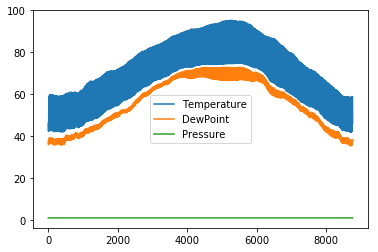

In [187]:
# Plot the raw data before setting the datetime index
df.plot()
plt.show()


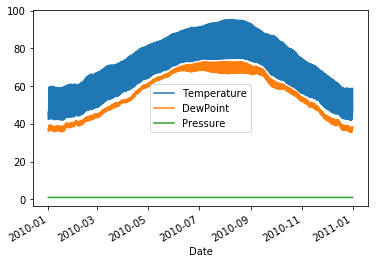

In [188]:
# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df['Date'])

# Set the index to be the converted 'Date' column
df.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()

In [189]:
df.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-12-31 14:00:00', '2010-12-31 15:00:00',
               '2010-12-31 16:00:00', '2010-12-31 17:00:00',
               '2010-12-31 18:00:00', '2010-12-31 19:00:00',
               '2010-12-31 20:00:00', '2010-12-31 21:00:00',
               '2010-12-31 22:00:00', '2010-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=8759, freq=None)

### Plotting date ranges, partial indexing

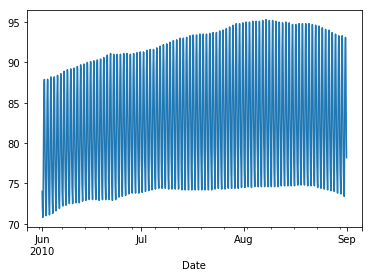

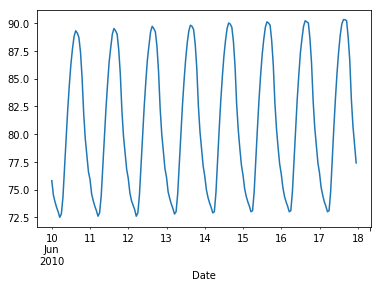

<Figure size 432x288 with 0 Axes>

In [198]:
# Plot the summer data
df.Temperature['2010 Jun':'2010 Aug'].plot()
# or df.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()

## Case Study - Sunlight in Austin

In [214]:
data = 'NOAA_QCLCD_2011_hourly_13904.txt'

In [215]:
# Read in the data file: df
df = pd.read_csv(data)

# Print the output of df.head()
print(df.head())

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv(data, header=None)

# Print the output of df_headers.head()
print(df_headers.head())

   13904  20110101  0053  12  OVC045     10.00  .1  .2  .3 ...   .18  .19  \
0  13904  20110101   153  12  OVC049     10.00             ...              
1  13904  20110101   253  12  OVC060     10.00             ...   030        
2  13904  20110101   353  12  OVC065     10.00             ...              
3  13904  20110101   453  12  BKN070     10.00             ...              
4  13904  20110101   553  12  BKN065     10.00             ...   015        

   29.95  .20  AA  .21  .22  .23 29.95.1  .24  
0  30.01       AA                  30.02       
1  30.01       AA                  30.02       
2  30.03       AA                  30.04       
3  30.04       AA                  30.04       
4  30.06       AA                  30.06       

[5 rows x 44 columns]
      0         1    2   3       4  5      6  7  8  9  ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00          ...          29.95      
1  13904  20110101  153  12  OVC049     10.00          ...        

### Re-assigning column names

In [216]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,\
visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,\
dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren\
,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,\
dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,\
wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag\
,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,\
presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type\
,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [217]:
list_to_drop =  ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

In [218]:
# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
print(df_dropped.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101   153           12        OVC049      10.00             51   
1  13904  20110101   253           12        OVC060      10.00             51   
2  13904  20110101   353           12        OVC065      10.00             50   
3  13904  20110101   453           12        BKN070      10.00             50   
4  13904  20110101   553           12        BKN065      10.00             49   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             37          3.0              14         -10.0   
1         10.6             37          2.9              13         -10.6   
2         10.0             38          3.1              17          -8.3   
3         10.0             37          2.8              15          -9.4   
4          9.4             37          2.8              17          -8.3   

  relative_humidity wind_speed wind_direction station_pr

### Cleaning and tidying datetime data

In [219]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
# Add leading zeros to the 'Time' column. 
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   
2011-01-01 05:53:00  13904  20110101  0553           12        BKN065   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   
2011-01-01 05:53:00      10.00             49          9.4             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 01:53:00          3.0

In [220]:
date_times.head()

0   2011-01-01 01:53:00
1   2011-01-01 02:53:00
2   2011-01-01 03:53:00
3   2011-01-01 04:53:00
4   2011-01-01 05:53:00
dtype: datetime64[ns]

### Cleaning the numeric columns

In [221]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00', 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


### Signal min, max, median

In [222]:
# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


In [227]:
df_climate = pd.read_csv('weather_data_austin_2010.csv', parse_dates=['Date'])
df_climate.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,2010-01-01 00:00:00
1,44.6,37.1,1.0,2010-01-01 01:00:00
2,44.1,36.9,1.0,2010-01-01 02:00:00
3,43.8,36.9,1.0,2010-01-01 03:00:00
4,43.5,36.8,1.0,2010-01-01 04:00:00


In [228]:
df_climate.set_index(df_climate.Date, inplace=True)

### Signal variance

In [229]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3300839215698725


In [231]:
daily_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0


In [233]:
daily_temp_climate.head()

0    49.337500
1    49.795833
2    49.900000
3    49.729167
4    49.841667
Name: Temperature, dtype: float64

In [232]:
daily_mean_2011.head()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904,12,50.130435,20.739130,10.913043
2011-01-02,13904,12,39.416667,19.708333,4.166667
2011-01-03,13904,12,46.846154,35.500000,2.653846
2011-01-04,13904,12,53.367347,50.408163,2.510204
2011-01-05,13904,12,57.965517,40.068966,4.689655


In [237]:
daily_temp_2011[:5]

array([50.13043478, 39.41666667, 46.84615385, 53.36734694, 57.96551724])

### Sunny or cloudy

In [238]:
# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean['sky_condition'].str.contains('CLR')]

# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


### Weekly average temperature and visibility

In [257]:
df_clean.visibility = pd.to_numeric(df_clean.visibility, errors='coerce')

In [258]:
df_clean.visibility.unique()

array([10.  ,  9.  ,  5.  ,  4.  ,  2.5 ,  1.5 ,  0.75,  3.  ,  2.  ,
        8.  ,  6.  ,  7.  ,  0.5 ,  1.25,  1.  ,  1.75,  0.25,   nan,
        0.12,  0.  ])

In [259]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10336 entries, 2011-01-01 01:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10336 non-null int64
date                  10336 non-null object
Time                  10336 non-null object
StationType           10336 non-null int64
sky_condition         10336 non-null object
visibility            10323 non-null float64
dry_bulb_faren        10325 non-null float64
dry_bulb_cel          10336 non-null object
wet_bulb_faren        10336 non-null object
wet_bulb_cel          10336 non-null object
dew_point_faren       10322 non-null float64
dew_point_cel         10336 non-null object
relative_humidity     10336 non-null object
wind_speed            10317 non-null float64
wind_direction        10336 non-null object
station_pressure      10336 non-null object
sea_level_pressure    10336 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage: 1.7+ MB


                visibility  dry_bulb_faren
visibility         1.00000         0.49004
dry_bulb_faren     0.49004         1.00000


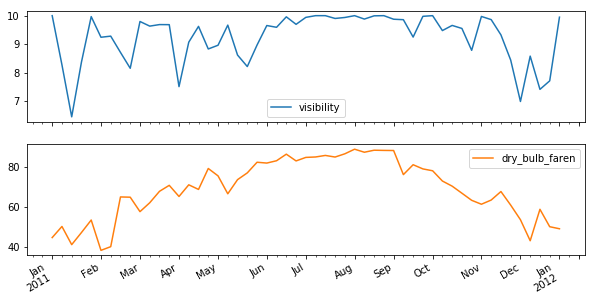

In [264]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True, figsize=(10,5));

In [265]:
weekly_mean.head()

,visibility,dry_bulb_faren
2011-01-02,10.000000,44.659574
2011-01-09,8.275785,50.246637
2011-01-16,6.451651,41.103774
2011-01-23,8.370853,47.194313
2011-01-30,9.966851,53.486188


### Daily hours of clear sky

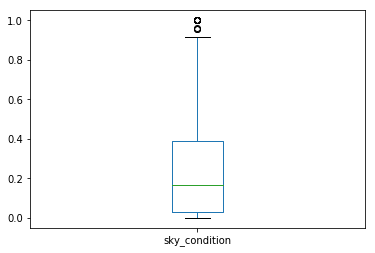

In [266]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean['sky_condition'] == 'CLR'

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample('D').sum()

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample('D').count()

# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

### Heat or humidity

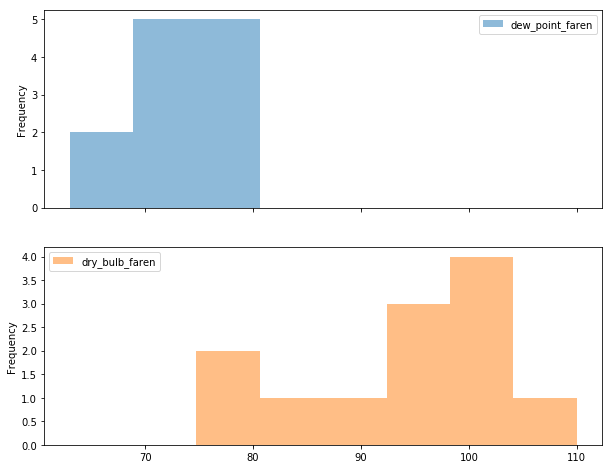

In [269]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=.5, subplots=True, figsize=(10,8))

# Show the plot
plt.show()

### Probability of high temperatures

95.3


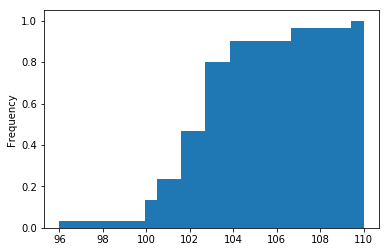

In [289]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug','Temperature'].max()
print(august_max)

# Resample the August 2011 temperatures in df_clean by day and aggregate the maximum value: august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()

# Filter for days in august_2011 where the value exceeded august_max: august_2011_high
august_2011_high = august_2011[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist', bins=25, cumulative=True, density=True)

# Display the plot
plt.show()

In [272]:
august_2011.head()

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
Freq: D, Name: dry_bulb_faren, dtype: float64

In [281]:
df_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').mean().head()

2011-08-01    89.125000
2011-08-02    91.291667
2011-08-03    90.083333
2011-08-04    89.791667
2011-08-05    89.541667
Freq: D, Name: dry_bulb_faren, dtype: float64

In [284]:
df_clean.loc['2011-Aug','dry_bulb_faren'].head(30) # max 103 -> 2011-08-01 16:53:00

2011-08-01 00:53:00     82.0
2011-08-01 01:53:00     79.0
2011-08-01 02:53:00     77.0
2011-08-01 03:53:00     75.0
2011-08-01 04:53:00     73.0
2011-08-01 05:53:00     69.0
2011-08-01 06:53:00     75.0
2011-08-01 07:53:00     81.0
2011-08-01 08:53:00     87.0
2011-08-01 09:53:00     93.0
2011-08-01 10:53:00     96.0
2011-08-01 11:53:00     99.0
2011-08-01 12:53:00    100.0
2011-08-01 13:53:00    100.0
2011-08-01 14:53:00    101.0
2011-08-01 15:53:00    101.0
2011-08-01 16:53:00    103.0
2011-08-01 17:53:00    101.0
2011-08-01 18:53:00     98.0
2011-08-01 19:53:00     92.0
2011-08-01 20:53:00     92.0
2011-08-01 21:53:00     90.0
2011-08-01 22:53:00     89.0
2011-08-01 23:53:00     86.0
2011-08-02 00:53:00     85.0
2011-08-02 01:53:00     83.0
2011-08-02 02:53:00     81.0
2011-08-02 03:53:00     79.0
2011-08-02 04:53:00     78.0
2011-08-02 05:53:00     77.0
Name: dry_bulb_faren, dtype: float64

In [287]:
august_2011_high.shape

(30,)

In [288]:
august_2011_high

2011-08-01    103.0
2011-08-02    103.0
2011-08-03    103.0
2011-08-04    104.0
2011-08-05    103.0
2011-08-06    102.0
2011-08-07    102.0
2011-08-08    103.0
2011-08-09    103.0
2011-08-10    102.0
2011-08-11    101.0
2011-08-12    100.0
2011-08-13     96.0
2011-08-14    101.0
2011-08-15    103.0
2011-08-16    102.0
2011-08-17    100.0
2011-08-18    104.0
2011-08-19    103.0
2011-08-20    104.0
2011-08-21    102.0
2011-08-22    103.0
2011-08-23    102.0
2011-08-24    102.0
2011-08-26    101.0
2011-08-27    107.0
2011-08-28    110.0
2011-08-29    107.0
2011-08-30    103.0
2011-08-31    100.0
Name: dry_bulb_faren, dtype: float64

notice how it shows that there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!